In [1]:
# First we do a set of imports
import csv
from pprint import pprint
import cinnabar
from cinnabar import plotting as cinnabar_plotting
from cinnabar import femap, stats

In [2]:
# temporarily loaded for the creation of a TSV file, although it is not used
# read in the experimental data

experimental_data = {}
experimental_filename = '../../RBFE_validation/NES/M_pocket/all/experimental_core4_Mpocket.tsv'

with open(experimental_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        experimental_data[row[0]] = {}
        experimental_data[row[0]]['dG'] = float(row[1])
        experimental_data[row[0]]['ddG'] = float(row[2])

pprint(experimental_data)

{'lig_13': {'dG': -10.5, 'ddG': 0.0},
 'lig_18': {'dG': -8.68, 'ddG': 0.0},
 'lig_19': {'dG': -8.45, 'ddG': 0.0},
 'lig_20': {'dG': -8.46, 'ddG': 0.0},
 'lig_21': {'dG': -8.51, 'ddG': 0.0},
 'lig_22': {'dG': -8.7, 'ddG': 0.0},
 'lig_23': {'dG': -8.48, 'ddG': 0.0},
 'lig_27': {'dG': -10.02, 'ddG': 0.0},
 'lig_28': {'dG': -9.13, 'ddG': 0.0},
 'lig_29': {'dG': -9.56, 'ddG': 0.0},
 'lig_30': {'dG': -10.67, 'ddG': 0.0},
 'lig_31': {'dG': -9.55, 'ddG': 0.0},
 'lig_32': {'dG': -9.77, 'ddG': 0.0},
 'lig_33': {'dG': -10.75, 'ddG': 0.0},
 'lig_34': {'dG': -11.21, 'ddG': 0.0},
 'lig_35': {'dG': -10.42, 'ddG': 0.0},
 'lig_36': {'dG': -10.75, 'ddG': 0.0}}


In [3]:
# Read in calculated results

calculated_data = {}
calculated_filename = './final_results_core4_R2.tsv'

with open(calculated_filename, 'r') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    headers = next(rd)
    for row in rd:
        tag = row[0] + "->" + row[1]
        calculated_data[tag] = {}
        calculated_data[tag]['ligand_i'] = row[0]
        calculated_data[tag]['ligand_j'] = row[1]
        calculated_data[tag]['dG'] = float(row[2])
        calculated_data[tag]['ddG'] = float(row[3])

pprint(calculated_data)

{'lig_10001-1->lig_11786-1': {'dG': 0.1599999999999966,
                              'ddG': 0.01,
                              'ligand_i': 'lig_10001-1',
                              'ligand_j': 'lig_11786-1'},
 'lig_10001-1->lig_1428-1': {'dG': -4.079999999999998,
                             'ddG': 0.01,
                             'ligand_i': 'lig_10001-1',
                             'ligand_j': 'lig_1428-1'},
 'lig_10001-1->lig_155-1': {'dG': 1.6000000000000003,
                            'ddG': 0.01,
                            'ligand_i': 'lig_10001-1',
                            'ligand_j': 'lig_155-1'},
 'lig_10001-1->lig_15511-1': {'dG': -0.5700000000000003,
                              'ddG': 0.01,
                              'ligand_i': 'lig_10001-1',
                              'ligand_j': 'lig_15511-1'},
 'lig_10001-1->lig_15511-4': {'dG': 2.4300000000000037,
                              'ddG': 0.01,
                              'ligand_i': 'lig_10001-1',
  

In [4]:
cinnabar_filename = './final_results_core4_R2_cin.tsv'

with open(cinnabar_filename, 'w') as f:
    f.write("# Experimental block\n")
    f.write("# Ligand, expt_DDG, expt_dDDG\n")
    for entry in experimental_data:
        dG = experimental_data[entry]['dG']
        ddG = experimental_data[entry]['ddG']
        f.write(f"{entry},{dG:.2f},{ddG:.2f}\n")
    f.write('\n')
    f.write('# Calculated block\n')
    f.write('# Ligand1,Ligand2,calc_DDG,calc_dDDG(MBAR),calc_dDDG(additional)\n')
    for entry in calculated_data:
        dG = calculated_data[entry]['dG']
        ddG = calculated_data[entry]['ddG']
        molA = calculated_data[entry]['ligand_i']
        molB = calculated_data[entry]['ligand_j']
        f.write(f"{molA},{molB},{dG:.2f},0,{ddG:.2f}\n")

/home/hiroyuki/miniforge3/envs/openfe_env/lib/python3.12/site-packages/cinnabar/femap.py:35: UserWarning: Assuming kcal/mol units on measurements
  warnings.warn("Assuming kcal/mol units on measurements")


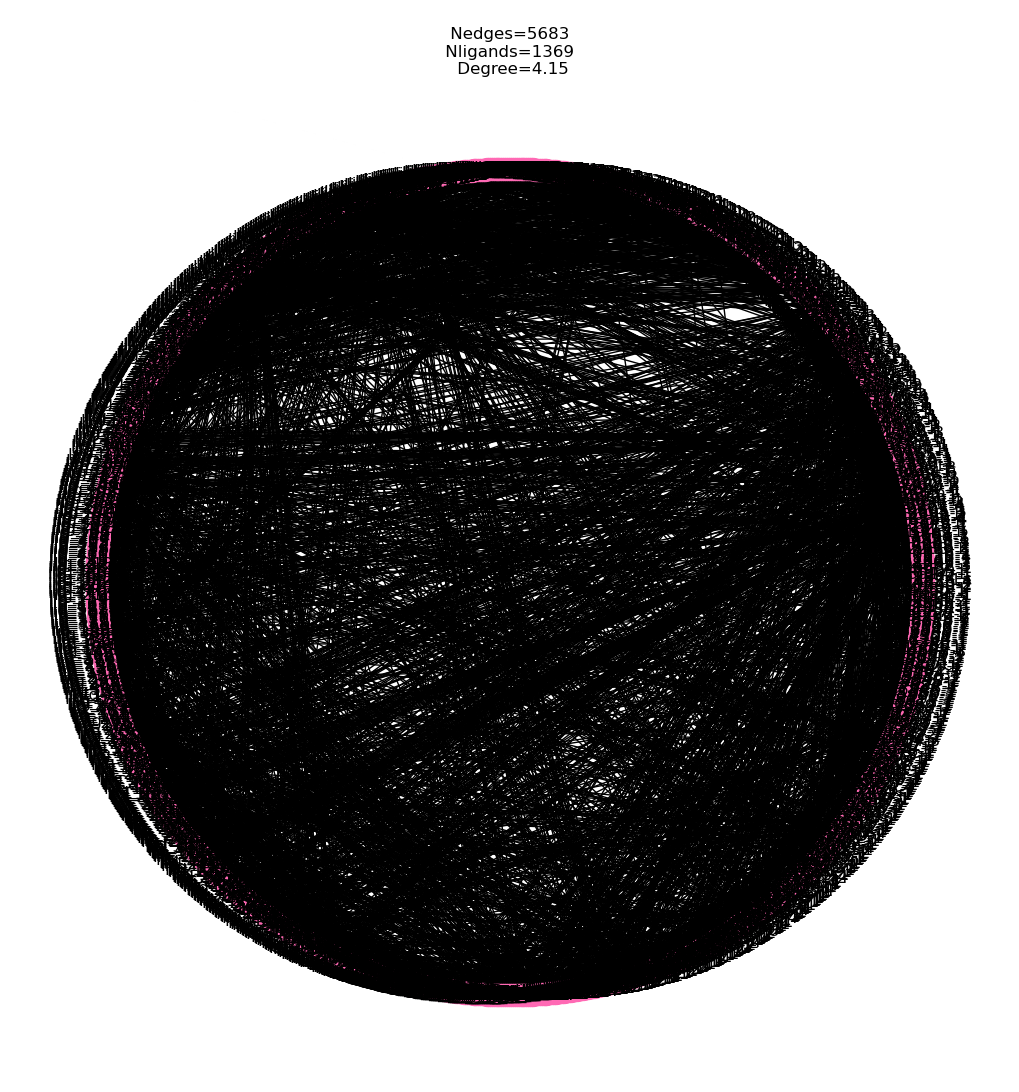

In [5]:
fe = femap.FEMap.from_csv('./final_results_core4_R2_cin.tsv')
fe.generate_absolute_values()  # Get MLE generated estimates of the absolute values
fe.draw_graph()
fe.generate_absolute_values()

In [6]:
dG_results = {}
nodes = list(fe.to_legacy_graph().nodes.data())
print(nodes)


for key in range(len(nodes)):
    dG_results[nodes[key][0]] = {
        #'experimental_estimate': nodes[key][1]['exp_DG'],
        #'experimental_error': nodes[key][1]['exp_dDG'],
        'calculated_estimate': round(nodes[key][1]['calc_DG'],2),
        'calculated_error': round(nodes[key][1]['calc_dDG'],2),
    }

# write out the calculated results
# set the DE(MLE) of "lig_13-99" as the reference to 0
with open('./cinnabar_output_core4_R2.dat', 'w') as f:
    writer = csv.writer(f, delimiter="\t", lineterminator="\n")
    writer.writerow(["ligand", "DG(MLE)", "uncertainty (kcal/mol)",])
    for ligand in dG_results:
        writer.writerow([
            ligand,
            dG_results[ligand]['calculated_estimate']+3.64,
            dG_results[ligand]['calculated_error'],
        ])
        print(dG_results[ligand])

[('lig_14876-4', {'calc_DG': -2.0300312221747916, 'calc_dDG': 0.007705551498971998}), ('lig_182-1', {'calc_DG': -0.05448804394527329, 'calc_dDG': 0.002497610955882677}), ('lig_27644-1', {'calc_DG': 0.5744255995956244, 'calc_dDG': 0.004939411489652925}), ('lig_39967-1', {'calc_DG': -3.7940864284798472, 'calc_dDG': 0.007406232052944121}), ('lig_3514-1', {'calc_DG': 0.3276671991469975, 'calc_dDG': 0.005589857351839252}), ('lig_17905-1', {'calc_DG': 0.7263597662130064, 'calc_dDG': 0.004175924387658456}), ('lig_4357-1', {'calc_DG': 1.8510016431288001, 'calc_dDG': 0.006606632010513172}), ('lig_15485-1', {'calc_DG': 2.620296332836748, 'calc_dDG': 0.004707757907476087}), ('lig_44002-3', {'calc_DG': -0.07902643179554758, 'calc_dDG': 0.005420879933341153}), ('lig_18799-1', {'calc_DG': 4.372120426109969, 'calc_dDG': 0.004620473145698989}), ('lig_42003-1', {'calc_DG': 0.9811897392250124, 'calc_dDG': 0.005559878186304022}), ('lig_21641-1', {'calc_DG': 2.938473330084573, 'calc_dDG': 0.00760853338722

In [7]:
import pandas as pd

# タブ区切りのファイルを読み込む
df = pd.read_csv('./cinnabar_output_core4_R2.dat', delimiter='\t')

# 'ligand'カラムから'lig_'を取り除いた新しいカラム'ligand_num'を作成
df['ligand_num'] = df['ligand'].str.replace('lig_', '')

# カンマ区切りのCSVファイルとして保存
df.to_csv('./cinnabar_output_core4_R2.csv', index=False)